# Analysis 1: Basic Information about the Dataset




In [5]:
import pandas as pd

# Load the CSV file with specified encoding
df = pd.read_csv('Data_Gov_Tamil_Nadu.csv', encoding='ISO-8859-1')


## Analysis 2: Data Cleaning and **Preprocessing**

In [6]:
# Example: Handling missing values
df.fillna(0, inplace=True)


# Analysis 3: Descriptive Statistics

In [7]:
# Example: Summary statistics for numeric columns
print("\nSummary Statistics for Numeric Columns:")
print(df.describe())



Summary Statistics for Numeric Columns:
       AUTHORIZED_CAP  PAIDUP_CAPITAL  INDUSTRIAL_CLASS
count    6.906000e+03    6.906000e+03       6906.000000
mean     8.507912e+07    4.536805e+07      15585.391833
std      1.212107e+09    8.030362e+08      15871.474108
min      0.000000e+00    0.000000e+00          0.000000
25%      5.000000e+05    1.000000e+04       1117.000000
50%      1.000000e+06    1.000000e+05      24100.000000
75%      4.000000e+06    1.000000e+06      24231.000000
max      5.363000e+10    4.789458e+10      99999.000000


# Analysis 4: Visualizations

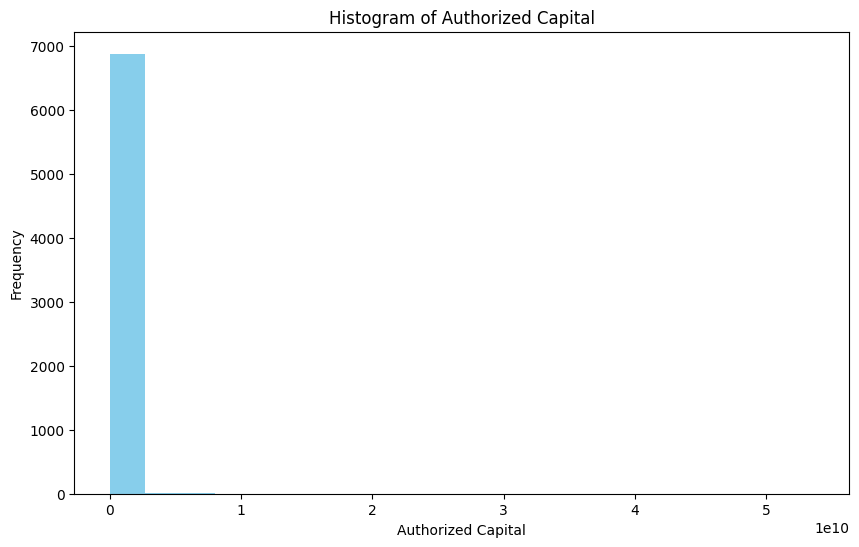

In [8]:
import matplotlib.pyplot as plt

# Example: Histogram of Authorized Capital
plt.figure(figsize=(10, 6))
plt.hist(df['AUTHORIZED_CAP'], bins=20, color='skyblue')
plt.title('Histogram of Authorized Capital')
plt.xlabel('Authorized Capital')
plt.ylabel('Frequency')
plt.show()


# Analysis 5: Grouping and Aggregation

In [9]:
# Example: Average Paid-up Capital by Company Category
avg_paidup_capital_by_category = df.groupby('COMPANY_CATEGORY')['PAIDUP_CAPITAL'].mean()
print("\nAverage Paid-up Capital by Company Category:")
print(avg_paidup_capital_by_category)



Average Paid-up Capital by Company Category:
COMPANY_CATEGORY
0                               9.646302e-01
Company Limited by Guarantee    3.962394e+08
Company limited by Shares       4.698501e+07
Unlimited Company               2.000000e+04
Name: PAIDUP_CAPITAL, dtype: float64


# Analysis 6: Correlation Matrix

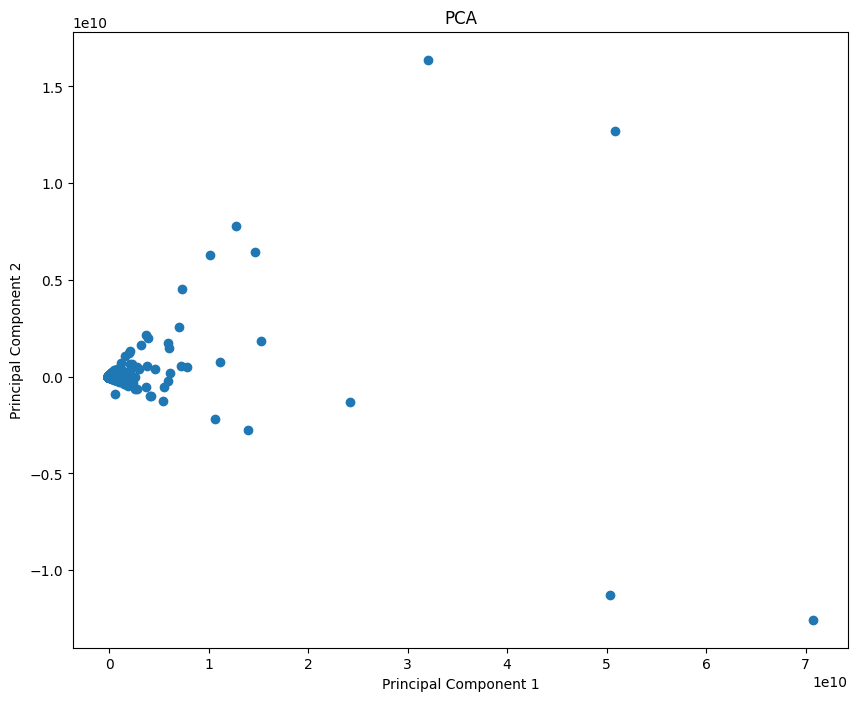

In [10]:
from sklearn.decomposition import PCA

# Assuming 'features' is a DataFrame containing only numeric columns
features = df.select_dtypes(include=['float64', 'int64'])
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
plt.figure(figsize=(10, 8))
plt.scatter(principal_df['PC1'], principal_df['PC2'])
plt.title('PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


# Analysis 7: Principal Component Analysis (PCA)

<ipython-input-11-7e79f78bd5cc>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


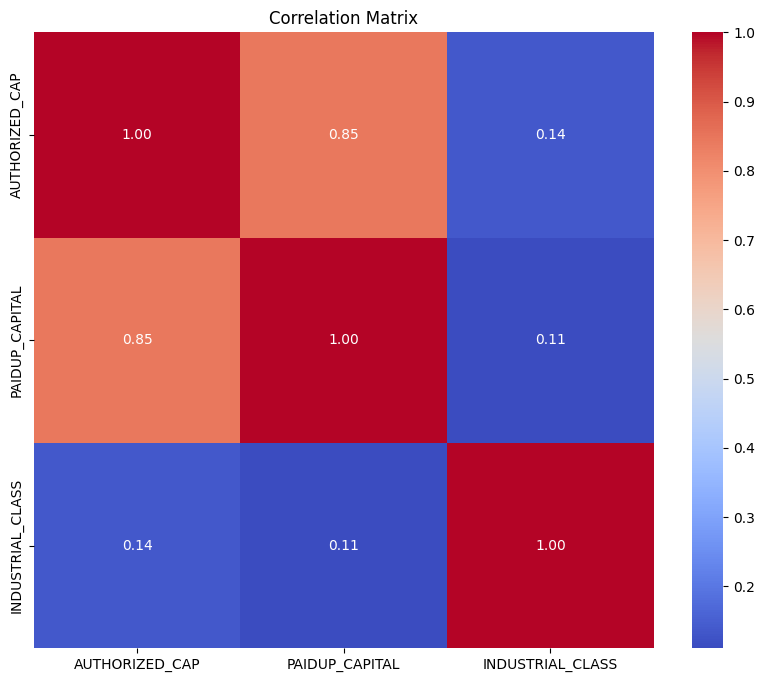

In [11]:
# Example: Correlation Matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Add this line

# ... (rest of your code)

correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [12]:
df.head()

,CORPORATE_IDENTIFICATION_NUMBER,COMPANY_NAME,COMPANY_STATUS,COMPANY_CLASS,COMPANY_CATEGORY,COMPANY_SUB_CATEGORY,DATE_OF_REGISTRATION,REGISTERED_STATE,AUTHORIZED_CAP,PAIDUP_CAPITAL,INDUSTRIAL_CLASS,PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN,REGISTERED_OFFICE_ADDRESS,REGISTRAR_OF_COMPANIES,EMAIL_ADDR,LATEST_YEAR_ANNUAL_RETURN,LATEST_YEAR_FINANCIAL_STATEMENT
0,F00643,"HOCHTIEFF AG,",NAEF,0,0,0,01-12-1961,Tamil Nadu,0.0,0.0,0.0,Agriculture & allied,"AMBLE SIDE, NO.8(OLD NO.30),3RD FLOOR KHADER N...",ROC DELHI,0,0,0
1,F00721,SUMITOMO CORPORATION (SUMITOMO SHOJI KAISHA LI...,ACTV,0,0,0,0,Tamil Nadu,0.0,0.0,0.0,Agriculture & allied,"FLAT NO. 6, 1st FLOOR, 113/113ARAMA NAICKEN ST...",ROC DELHI,shuchi.chug@asa.in,0,0
2,F00892,SRILANKAN AIRLINES LIMITED,ACTV,0,0,0,01-03-1982,Tamil Nadu,0.0,0.0,0.0,Agriculture & allied,"SRILANKAN AIRLINES LIMITED, VIJAYA TOWERSNO-4,...",ROC DELHI,shree16us@yahoo.com,0,0
3,F01208,CALTEX INDIA LIMITED,NAEF,0,0,0,0,Tamil Nadu,0.0,0.0,0.0,Agriculture & allied,GOLD CREST 24 55 NORTHUSMAN ROAD T NAGAR,ROC DELHI,0,0,0
4,F01218,GE HEALTHCARE BIO-SCIENCES LIMITED,ACTV,0,0,0,0,Tamil Nadu,0.0,0.0,0.0,Agriculture & allied,FF-3 Palani Centre32 Venkat Naryan Road Nagar,ROC DELHI,karthick9999@yahoo.com,0,0


In [20]:

# Assuming other relevant columns are potential features
x = df.drop([ 'CORPORATE_IDENTIFICATION_NUMBER', 'COMPANY_NAME', 'COMPANY_STATUS', 'DATE_OF_REGISTRATION'], axis=1)

# Assuming 'COMPANY_CATEGORY' is the column representing the trend category you want to predict
y = df['REGISTRAR_OF_COMPANIES']


In [28]:
df['REGISTRAR_OF_COMPANIES'] = df['REGISTRAR_OF_COMPANIES'].astype(str)

Label Encoding

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['REGISTRAR_OF_COMPANIES'] = le.fit_transform(df['REGISTRAR_OF_COMPANIES'])

Data Splitting and Model Training

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [31]:
x = df[['AUTHORIZED_CAP','PAIDUP_CAPITAL','INDUSTRIAL_CLASS']]
y = df['REGISTRAR_OF_COMPANIES']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [33]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

Model Evaluation

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix  # Replace with relevant metrics

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [35]:
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.7981186685962374
Confusion Matrix:
[[  1   1   1   0]
 [  1 914  85   0]
 [  0 191 119   0]
 [  0   0   0  69]]


Hyperparameter Tuning

In [37]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'n_estimators': [50, 100, 200]})

In [38]:
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print(f"Best Parameters: {best_params}")

Best Parameters: {'max_depth': 10, 'n_estimators': 50}


In [39]:
y_pred = best_model.predict(X_test)

In [40]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [41]:
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.8241678726483358
Confusion Matrix:
[[  0   3   0   0]
 [  0 984  16   0]
 [  0 224  86   0]
 [  0   0   0  69]]
